# Analyse exploratoire des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Importons et observons nos données

In [2]:
df_red = pd.read_csv("winequality-red.csv")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_white = pd.read_csv("winequality-white.csv", sep=";")
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Regroupons les données dans un même data frame

In [6]:
# On crée une nouvelle colonne contenant 1 pour les vins rouges, 0 pour les vins blancs
df_red["wine_type"] = 1
df_white["wine_type"] = 0

# On combine les data frame
df = pd.concat([df_red, df_white])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


On remarque qu'il ne semble pas y avoir de valeurs manquantes.

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [8]:
df.duplicated().sum()

1177

Les doublons représentent une part significative de notre data set. On suppose que ces lignes ne sont pas due a des erreurs et on ne va pas les supprimer.
Regardons maintenant la distribution de nos différentes variables.

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'wine_type'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

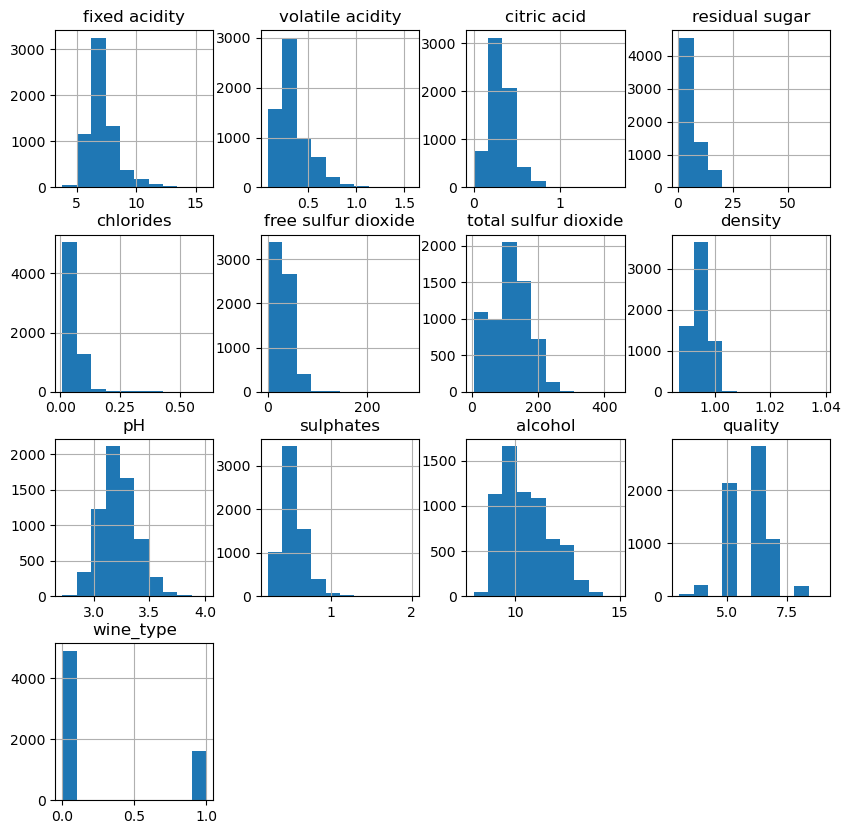

In [9]:
df.hist(figsize = (10,10))

On notera que la répartition entre les vins blancs et vins est inégale. Dans l'idéal, il faudrait éviter cela car il pourrait y avoir un impact sur notre futur modèle.

<Axes: >

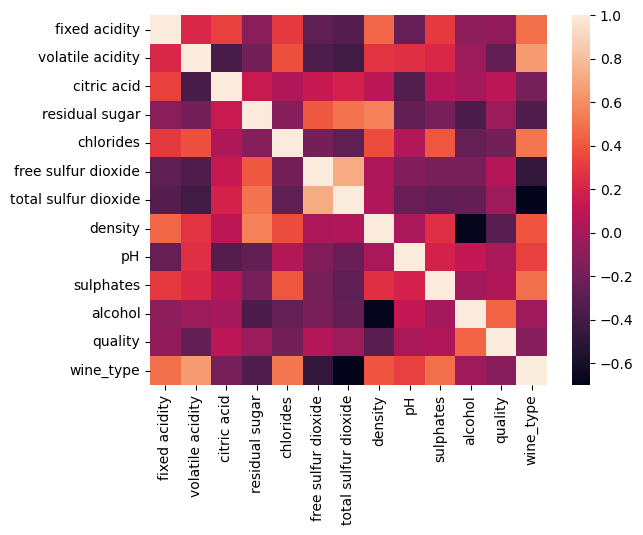

In [10]:
sns.heatmap(df.corr())

En observant la variable "quality" sur la matrice de corrélation, il semble que le taux d'alcool est un impact plus fort que les autres variables.

# Prétraitement des données

Divisons nos données en deux : un premier jeu de donnée d'entraînement et un deuxième de test

In [11]:
X = df.drop(["quality"],axis=1)
y = df["quality"]
seed = 33
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5197, 12) (5197,) (1300, 12) (1300,)


Nous allons tester les trois algorithmes suivant : LinearRegression, SVR, RandomForestRegressor pour tenter de prédire la qualité d'un vin. LinearRegression et SVR étant sensible à l'échelle, nous allons d'abord devoir standardiser nos données.

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.38106424, -0.42333744,  0.152051  , ..., -0.35328639,
         1.35085185, -0.57046226],
       [ 1.62710737,  1.9359534 , -0.40374927, ..., -0.75380179,
        -0.74429444,  1.75296435],
       [-1.56587815,  0.15882524, -1.65429985, ..., -0.9540595 ,
        -0.49287688, -0.57046226],
       ...,
       [ 1.23771889,  0.80226819,  1.19417649, ...,  0.44774442,
        -0.57668273,  1.75296435],
       [-1.33224506, -0.66845857, -0.89007449, ..., -0.68704923,
        -0.07384762, -0.57046226],
       [ 0.30318655, -0.05565575,  0.22152603, ..., -0.9540595 ,
         1.267046  , -0.57046226]])

Faisons une validation croisée pour évaluer nos trois modèles. Pour le scoring, on utilisera l'algorithme "Root Mean Squared Error".

In [13]:
lr_cvs = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=3, scoring = "neg_root_mean_squared_error")
rf_cvs = cross_val_score(RandomForestRegressor(random_state=seed), X_train_scaled, y_train, cv=3, scoring = "neg_root_mean_squared_error")
svr_cvs = cross_val_score(SVR(), X_train_scaled, y_train, cv=3, scoring = "neg_root_mean_squared_error")

Affichons les performances des trois modèles.

In [14]:
lr_cvs

array([-0.73253584, -0.73110956, -0.72582852])

In [15]:
rf_cvs

array([-0.62019518, -0.63840678, -0.6369258 ])

In [16]:
svr_cvs

array([-0.67342018, -0.68137323, -0.67191659])

In [17]:
print("Regression linéaire : ", lr_cvs.mean(), "ForetAleatoire : ", rf_cvs.mean(), "SVM : ", svr_cvs.mean())

Regression linéaire :  -0.7298246371416165 ForetAleatoire :  -0.6318425906491011 SVM :  -0.6755700011223958


La régression linéaire semble être la moins performante, ce qui n'est pas surprenant car il n'y avait pas de forte corrélation visible entre la qualité et une autre variable sur la matrice de corrélation. Gardons le modèle le plus performant, c'est à dire l'algorithme RandomForest

# Construction du modèle

In [18]:
model = RandomForestRegressor(random_state=seed)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=33)

In [19]:
y_pred = model.predict(X_test_scaled)
y_pred

array([6.4 , 5.82, 6.25, ..., 5.38, 5.09, 4.98])

In [20]:
mean_squared_error(y_test, y_pred, squared=False)

0.6307860176002635

L'erreur moyenne est d'environ 0,63 ce qui signifie que le vrai résultat appartient à l'ensemble [prediction-0.63, prediction+0.63]

# Conclusion

Cherchons les paramètres qui influencent le plus la qualité du vin.

In [21]:
res = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
res

alcohol                 0.256182
volatile acidity        0.128995
free sulfur dioxide     0.083023
sulphates               0.074916
residual sugar          0.074118
total sulfur dioxide    0.072757
pH                      0.069952
chlorides               0.065904
citric acid             0.060126
density                 0.057694
fixed acidity           0.054389
wine_type               0.001944
dtype: float64

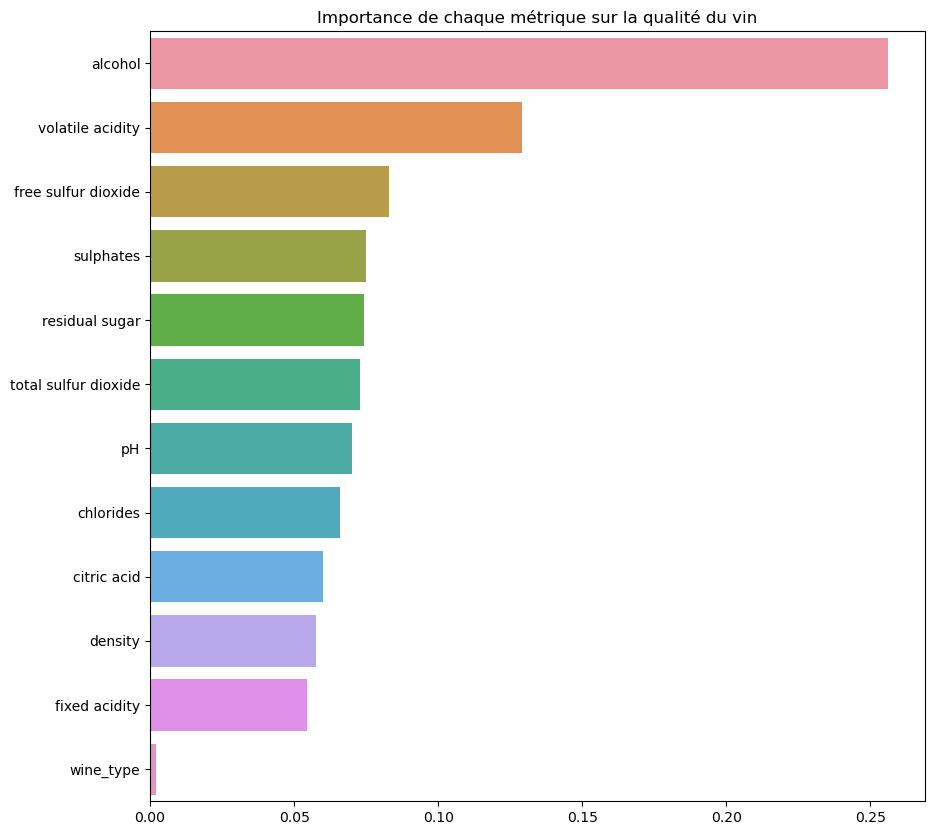

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x=res, y=res.index)
plt.title("Importance de chaque métrique sur la qualité du vin")
plt.show()

**On remarque clairement que le taux d'alcool est la métrique qui influence le plus la qualité d'un vin. Il faudra aussi surveiller la quantité d'acide acétique qui a des niveaux trop élevés, peut donner un goût désagréable de vinaigre et réduire la qualité.**